In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# ***Business Understanding***

Airbnb is an online marketplace which lets people to rent their properties, rooms in their house, or share their rooms to the guests. This blog is an effort to interpret the Airbnb, Boston dataset retrieved from Kaggle and answer few business questions, mentioned below.

The dataset retrieved is a collection of property listings, their key features and types, such as property type, host type, neighborhood, reviews and much more.





1) What are the most important factors in property valuation?

2) What are the factors in price determination?

3 )What time of year has the highest rental prices?



In [47]:

%matplotlib inline
#import necessary libraries for performing prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Data Understanding

In [48]:
#Kaggle dataset
df_list = pd.read_csv("listings.csv")
df_cal = pd.read_csv("calendar.csv")
df_rev = pd.read_csv("reviews.csv")

#Number of rows and columns in the dataset
for data in [df_list, df_cal, df_rev]:
    print(data.shape)

(3585, 95)
(1308890, 4)
(68275, 6)


In [49]:
#Dataset and identify the data type
for data in [df_list, df_cal, df_rev]:
    display(data.head(5))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [50]:
#check for the datatype and the number of non-null values in the dataset

df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [51]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [52]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [53]:

#Remove the column which has all values as NaN
df_list.dropna(axis = 1, how = 'all', inplace = True)
df_list.shape

(3585, 91)

# Listing Dataset Preparation

* In order to analyse the property size, we need to consider the **property type, room type, and bedrooms** feature from the data set.

* We will further explore the above said feature and create a new dataframe.

In [54]:
#Fill na cannot be interpreted with numerical methods to fillna
df_list['host_response_rate'].fillna(method = 'backfill', inplace = True)
df_list['host_acceptance_rate'].fillna(method = 'backfill', inplace = True)
df_list['host_response_time'].fillna(method = 'backfill', inplace = True)


#Remove percentage sign and convert the data type to int
df_list['host_response_rate'] = (df_list['host_response_rate'].str[:-1].astype(int))
df_list['host_acceptance_rate'] = (df_list['host_acceptance_rate'].str[:-1].astype(int))



* accommodates                        3585 non-null int64
* bathrooms                           3571 non-null float64
* bedrooms                            3575 non-null float64
* beds                                3576 non-null float64
* bed_type                            3585 non-null object

In [55]:
#drop na rows in bathrooms, bedrooms, beds
df_list.dropna(axis = 0, subset = ["bathrooms", "bedrooms", "beds"], inplace = True)

#Creating new dataframe 
df_rooms = df_list[["bathrooms", "bedrooms", "beds"]]

#Converting string to integer
for room in df_rooms:
    df_rooms[room].astype(int)
    
#Assigning values from df_rooms to the df_list
df_list[["bathrooms", "bedrooms", "beds"]] = df_rooms[["bathrooms", "bedrooms", "beds"]]

In [56]:
#convert str into float and replace $ from the price 
for feature in ["cleaning_fee", "security_deposit", "price"]:
    df_list[feature] = df_list[feature].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')
    df_list[feature] = df_list[feature].astype(float)
    df_list[feature].fillna(df_list[feature].median(), inplace = True)
    
    

# Lets fill na with median values for reviews columns
 
for feature in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]:
    df_list[feature].fillna(df_list[feature].mean(), inplace = True)

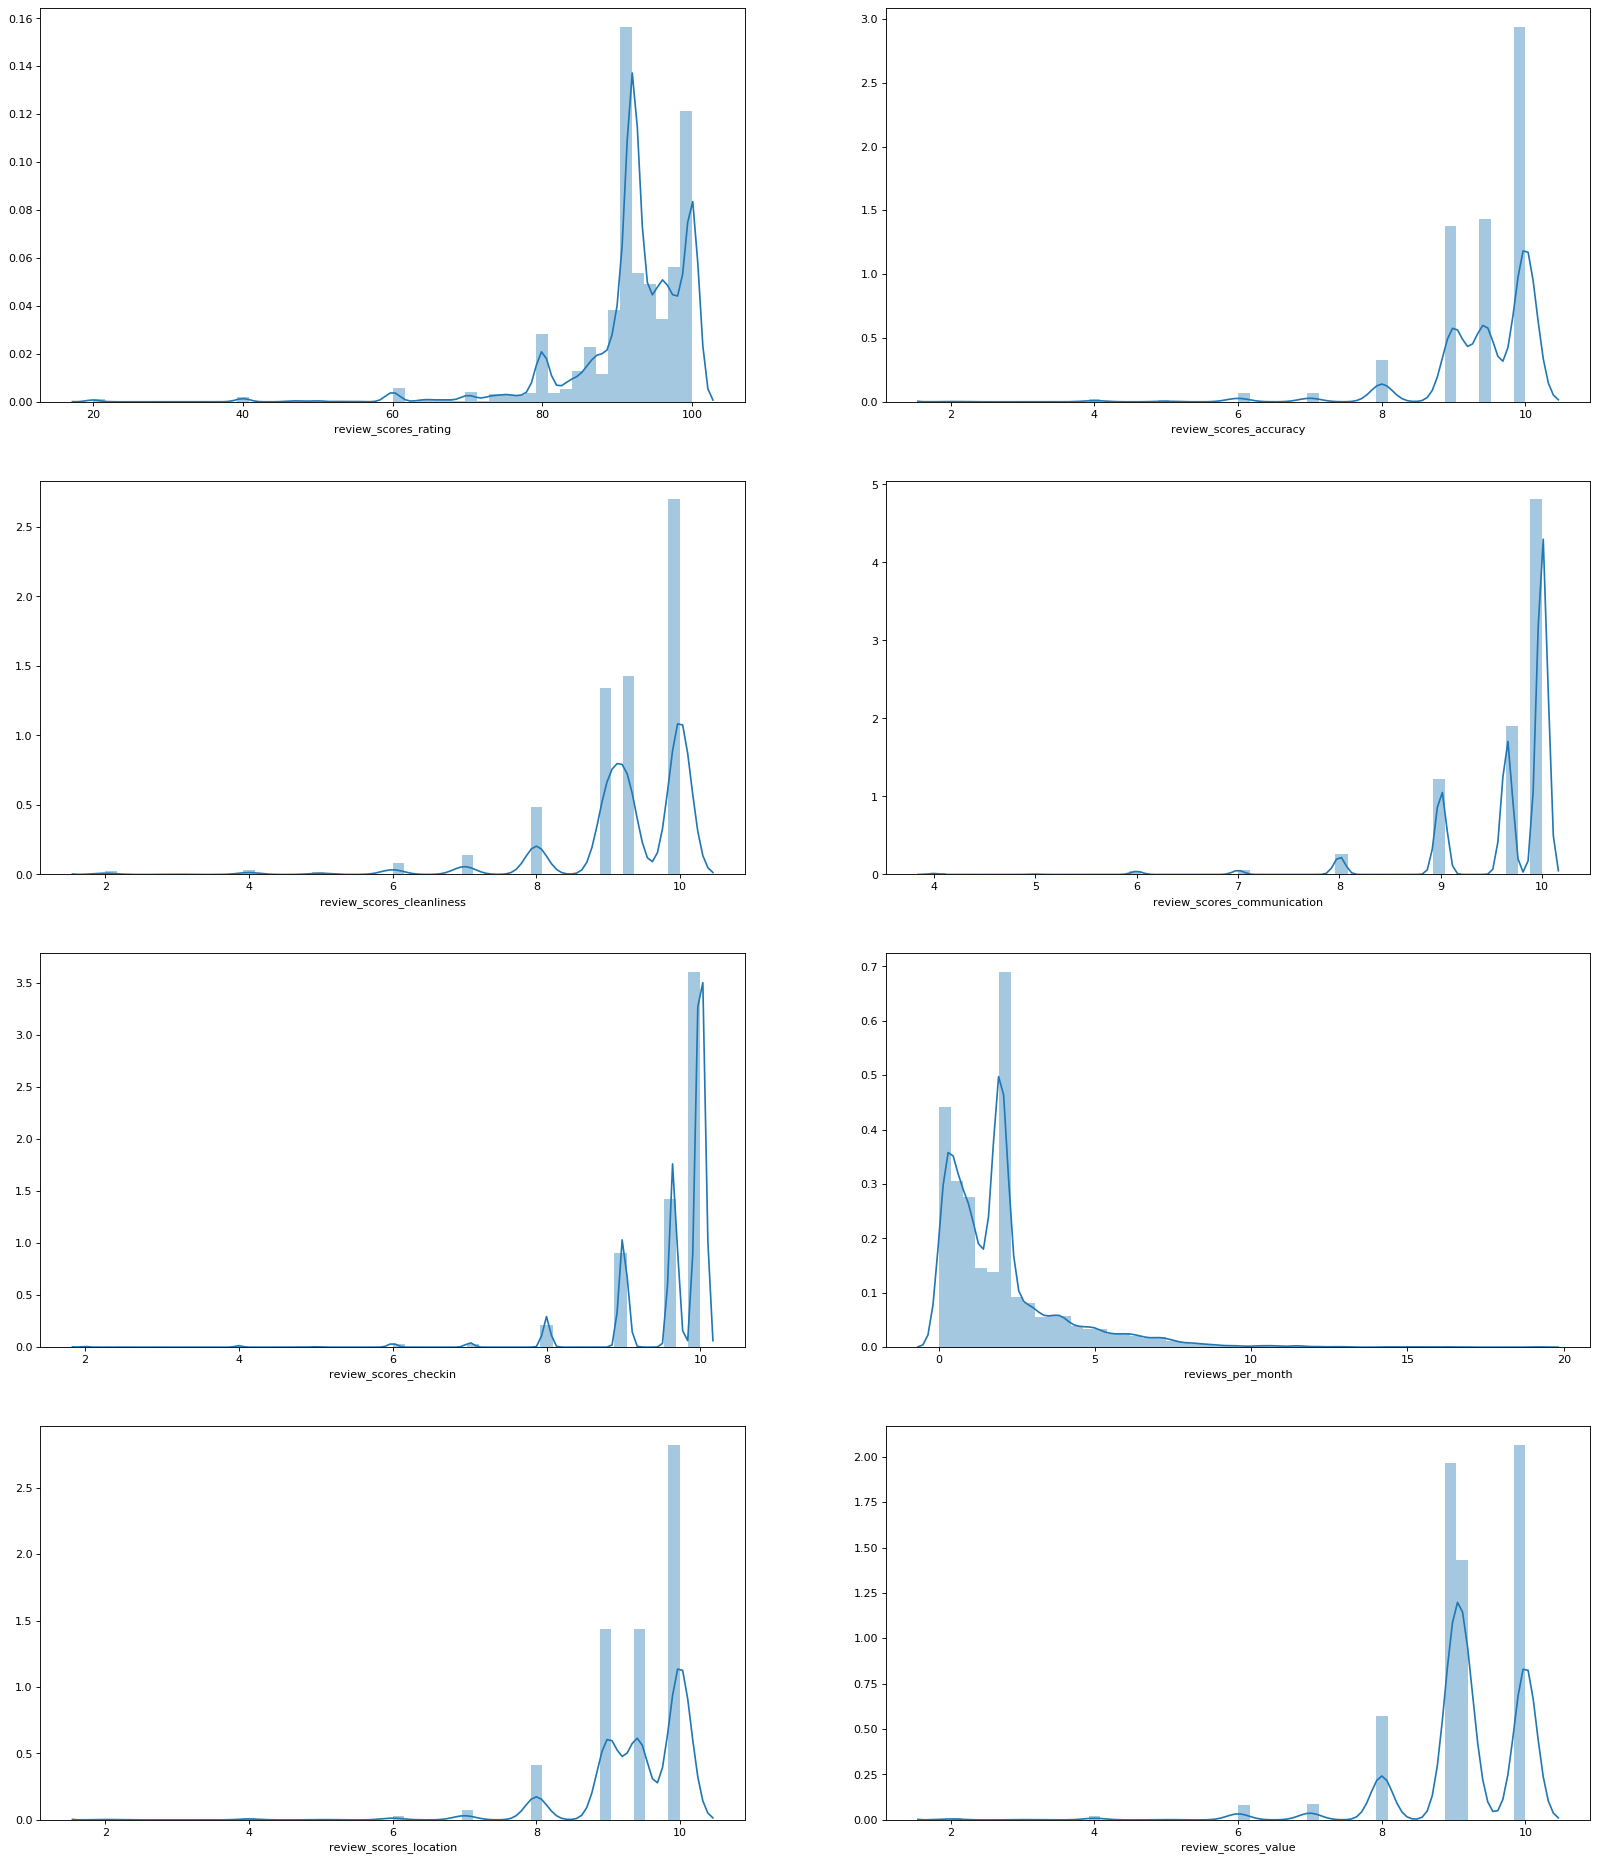

In [57]:
#the distribution of review data
fig, axs = plt.subplots(4, 2, figsize=(25, 30), dpi=80)

sns.distplot(df_list["review_scores_rating"], ax=axs[0, 0])
sns.distplot(df_list["review_scores_accuracy"], ax=axs[0, 1])
sns.distplot(df_list["review_scores_cleanliness"], ax=axs[1, 0])
sns.distplot(df_list["review_scores_communication"], ax=axs[1, 1])
sns.distplot(df_list["review_scores_checkin"], ax=axs[2, 0])
sns.distplot(df_list["reviews_per_month"], ax=axs[2, 1])
sns.distplot(df_list["review_scores_location"], ax=axs[3, 0])
sns.distplot(df_list["review_scores_value"], ax=axs[3, 1])

In [58]:
df_list.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.557000e+03,3.557000e+03,3.557000e+03,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,...,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000
mean,8.476487e+06,2.016091e+13,2.499042e+07,95.123981,84.327242,57.767501,57.767501,42.340056,-71.084846,3.049199,...,18.925780,91.954562,9.435401,9.261202,9.648195,9.652095,9.416636,9.175055,12.584481,1.975508
std,4.475151e+06,8.751230e-01,2.288732e+07,12.501500,21.805660,169.694534,169.694534,0.024443,0.031650,1.782176,...,35.329346,8.370017,0.816307,1.024958,0.669836,0.641802,0.787665,0.884813,29.311541,1.886599
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,0.000000,0.000000,42.235942,-71.171789,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.010000
25%,4.759640e+06,2.016091e+13,6.201198e+06,98.000000,71.000000,1.000000,1.000000,42.329995,-71.105300,2.000000,...,1.000000,91.000000,9.000000,9.000000,9.648195,9.652095,9.000000,9.000000,1.000000,0.650000
50%,8.607856e+06,2.016091e+13,1.945533e+07,100.000000,95.000000,2.000000,2.000000,42.345230,-71.078429,2.000000,...,5.000000,92.000000,9.435401,9.261202,10.000000,10.000000,9.416636,9.175055,2.000000,1.920000
75%,1.279749e+07,2.016091e+13,3.623803e+07,100.000000,100.000000,7.000000,7.000000,42.354788,-71.062130,4.000000,...,21.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,2.130000
max,1.493346e+07,2.016091e+13,9.385411e+07,100.000000,100.000000,749.000000,749.000000,42.389982,-71.000100,16.000000,...,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000


In [59]:
#New dataframe only the numerical columns
df_int = df_list.select_dtypes(include=['int64', 'float64'])

#add categorical columns to df_int
df_int[['superhost', 'room_type', 'neighbourhood_cleansed', 'cancellation_policy', 
        'property_type', 'host_response_time']] = df_list[['host_is_superhost', 
                                                           'room_type', 'neighbourhood_cleansed', 
                                                           'cancellation_policy', 'property_type', 'host_response_time']]

#drop the columns
df_int.drop(labels = ["square_feet"], axis = 1, inplace = True)
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 37 columns):
id                                3557 non-null int64
scrape_id                         3557 non-null int64
host_id                           3557 non-null int64
host_listings_count               3557 non-null int64
host_total_listings_count         3557 non-null int64
latitude                          3557 non-null float64
longitude                         3557 non-null float64
accommodates                      3557 non-null int64
bathrooms                         3557 non-null float64
bedrooms                          3557 non-null float64
beds                              3557 non-null float64
price                             3557 non-null float64
security_deposit                  3557 non-null float64
cleaning_fee                      3557 non-null float64
guests_included                   3557 non-null int64
minimum_nights                    3557 non-null int64
maximum_night

C:\Program Files\ANACONDA3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Program Files\ANACONDA3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:

cleanup_nums = {"superhost":     {"t": 1, "f": 2},
                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3},
               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}}
df_int_copy = df_int
df_int_copy = df_int_copy.replace(cleanup_nums)


df_int_dummies = pd.get_dummies(df_int_copy)

# Calendar Dataset Preparation

In [61]:
#dates column
df_cal['month'] = df_cal.date.apply(lambda value: value.split('-')[1])
df_cal['month'] = df_cal['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

#Remove special character $ 
#Drop rowns with na value in price column
df_cal.dropna(axis = 0, subset = ["price"], inplace = True)
df_cal["price"] = df_cal["price"].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore').astype(float)

df_cal.head()

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,65.0,Aug
366,3075044,2017-08-21,t,65.0,Aug
367,3075044,2017-08-20,t,65.0,Aug
368,3075044,2017-08-19,t,75.0,Aug
369,3075044,2017-08-18,t,75.0,Aug


# Predict Property Pricing

MAE from RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False):47.16267790262172
MAE from LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False):32596.57958801498


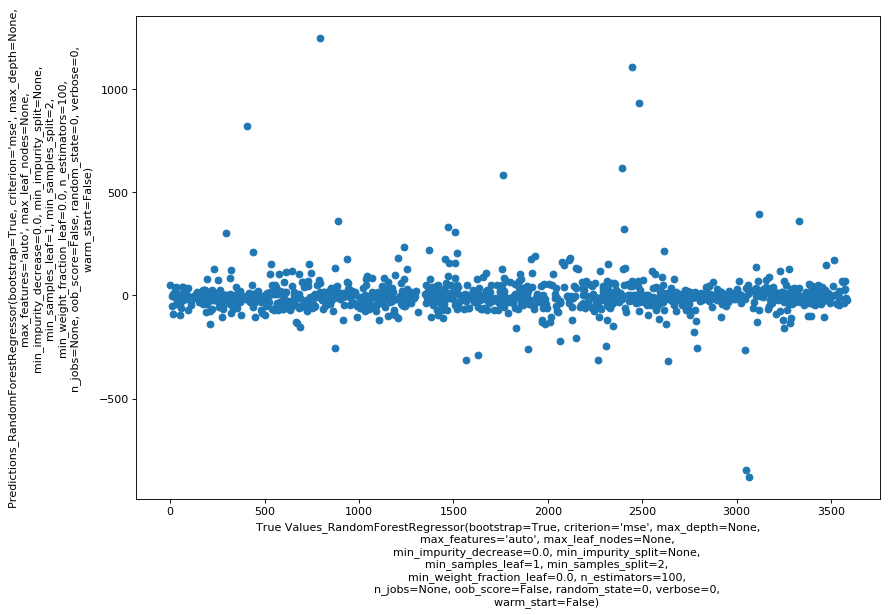

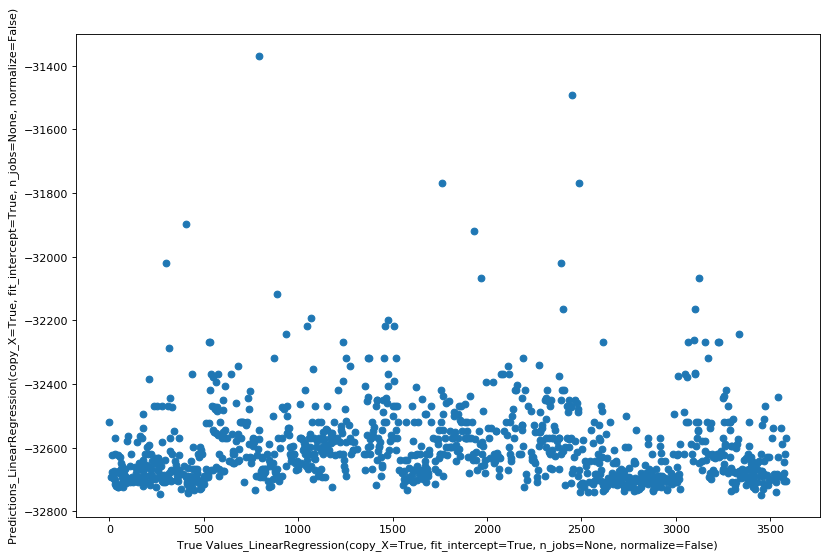

In [62]:
#Assign target y variable and features X variable
y = df_int_dummies.price

X = df_int_dummies.drop(labels = ["price"], axis = 1)

#split test and train dataset from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


def model_evaluate(model, x_train, y_train, x_test, y_test):

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, pred)
    print("MAE from {0}:{1}".format(model, mae))
    fig = plt.figure(figsize=(12, 8), dpi=80)
    ax1 = fig.add_subplot(111)
    lines = plt.plot(y_test - pred,marker='o',linestyle='')
    ax1.set_xlabel('True Values_{}'.format(model))
    ax1.set_ylabel('Predictions_{}'.format(model))

#Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)    
model_evaluate(model_rf, X_train, y_train, X_test, y_test)

#Linear Regression
model_lr = LinearRegression()
model_evaluate(model_lr, X_train, y_train, X_test, y_test)

Random forest has a MAE of 46.944 comparing to Linear Regression MAE value 171.42, Random forest model is performing better than Linear Regression.

# Data Analysis & Visualization



In [63]:
#Count the number of total number of entries in room_type feature
df_int.groupby(['room_type']).count()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,superhost,neighbourhood_cleansed,cancellation_policy,property_type,host_response_time
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,...,2113,2113,2113,2113,2113,2113,2113,2113,2111,2113
Private room,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,...,1365,1365,1365,1365,1365,1365,1365,1365,1364,1365
Shared room,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79


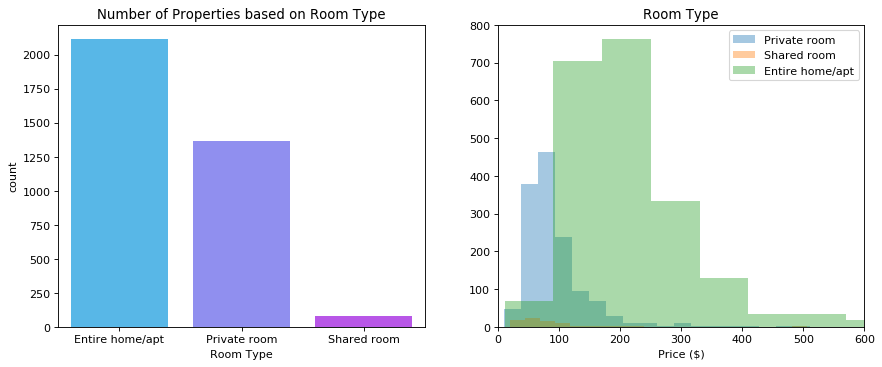

In [64]:
#Visualize the room_type and their mean price
fig, axs = plt.subplots(1, 2, figsize=(13, 5), dpi=80)
sns.countplot(x = 'room_type', data = df_int, 
              palette = 'cool', ax=axs[0]).set_title("Number of Properties based on Room Type")
axs[0].set_xlabel('Room Type')


#Visualize pricing among the each room type.
sns.distplot(df_int[df_int.room_type == 'Private room']['price'],
             kde=False, ax=axs[1], label='Private room')
sns.distplot(df_int[df_int.room_type == 'Shared room']['price'],
             kde=False, ax=axs[1], label='Shared room')
sns.distplot(df_int[df_int.room_type == 'Entire home/apt']['price'],
             kde=False, ax=axs[1], label='Entire home/apt')

axs[1].set_xlim(0, 600)
axs[1].set_title('Room Type')
axs[1].set_xlabel('Price ($)')
axs[1].legend()

The breakdown of the list on the Boston city map shows that a dense number of lists are scattered around the major roads and railways. In addition, the station and the coastal area are quite crowded.

ModuleNotFoundError: No module named 'folium'

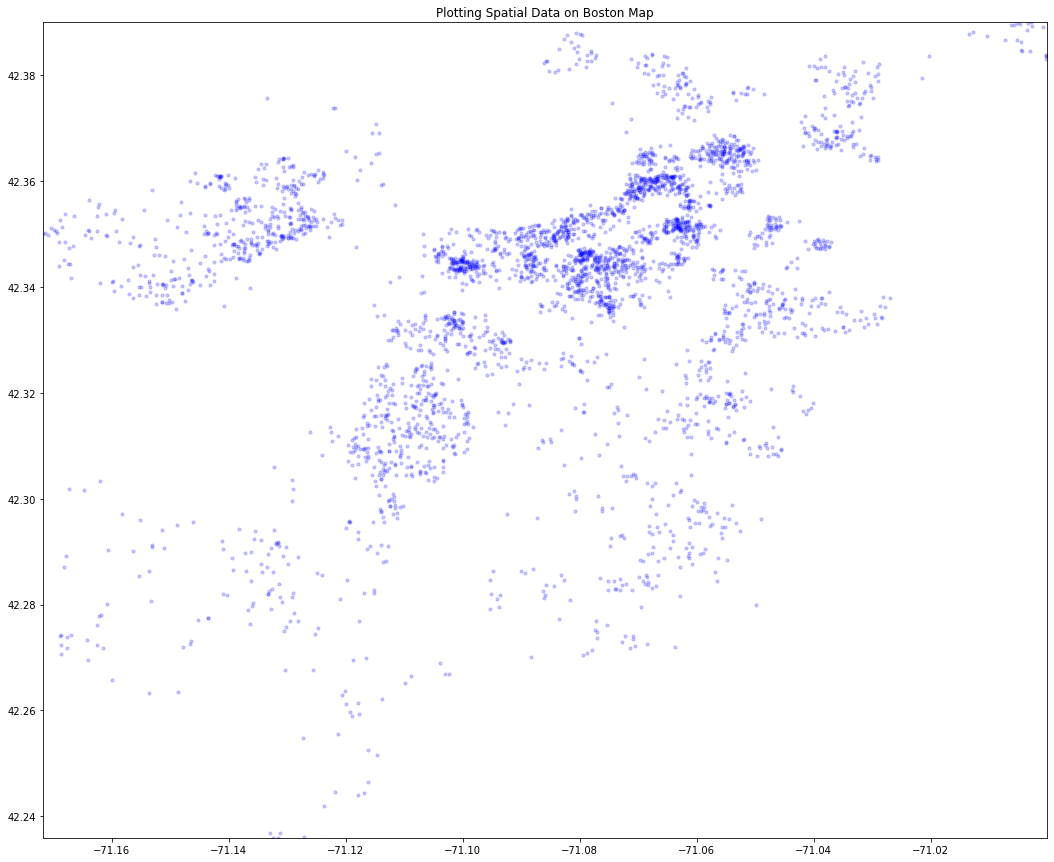

In [65]:
#Data on Boston Map
LatLong = (df_int.longitude.min(), df_int.longitude.max(), df_int.latitude.min(), df_int.latitude.max())
LatLong


fig, ax = plt.subplots(figsize = (18,15))
ax.scatter(df_int.longitude, df_int.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Boston Map')
ax.set_xlim(LatLong[0],LatLong[1])
ax.set_ylim(LatLong[2],LatLong[3])

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Create a map
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10)

HeatMap(data[[ax.set_xlim(LatLong[0],LatLong[1]), ax.set_ylim(LatLong[2],LatLong[3])]], radius=10).add_to(m_1)

# Display the map
m_1



In [66]:
before = len(df_list.columns)

# Drop columns with all null values
all_null = len(df_list.columns[df_list.isnull().mean() == 1])
df_list = df_list.dropna(how='all', axis=1)

# Drop columns more than 50% null values
more_null = df_list.columns[df_list.isnull().mean() > 0.5]
df_list = df_list.drop(more_null, axis=1)

# Drop columns with only one value
one_value_columns = [
    column for column in df_list.columns if len(df_list[column].unique()) == 1
]
df_list.drop(one_value_columns, axis=1, inplace=True)

url_id_columns = df_list.columns[df_list.columns.str.contains('url|_id|name')]
df_list = df_list.drop(url_id_columns, axis=1)

print(
    '{} columns dropped:\
    \n\t{} columns with only null values\
    \n\t{} columns with more 50% null values\
    \n\t{} columns with only one unique value\
    \n\t{} URL/ID/name columns'.format(
        before - len(df_list.columns), all_null, len(more_null),
        len(one_value_columns), len(url_id_columns)
    )
)

24 columns dropped:    
	0 columns with only null values    
	4 columns with more 50% null values    
	8 columns with only one unique value    
	12 URL/ID/name columns


Now we will drop a bunch of features for various reasons:

- they're covered by other features
- they are likely to add variance to the model by being colinear to our target variable
- they are almost completely one value

In [67]:
to_drop = [
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'street', 'neighbourhood',
    'city', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
    'is_location_exact', 'cleaning_fee', 'guests_included', 'extra_people',
    'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_30',
    'bed_type', 'availability_60', 'availability_90', 'availability_365',
    'first_review', 'last_review', 'review_scores_rating', 
    'review_scores_accuracy', 'review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'require_guest_profile_picture', 
    'require_guest_phone_verification'
]

df_list = df_list.drop(to_drop, axis=1)

In [68]:
# Define features
description_features = ['summary', 'space', 'description', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'host_about']

# Convert null to empty
df_list[description_features] = df_list[description_features].apply(lambda col: col.fillna(''), axis=1)

# Convert character counts
for column in df_list[description_features]:
    df_list[column] = df_list[column].apply(lambda x: len(x))

df_list.host_since = pd.to_datetime(df_list.host_since, yearfirst=True)
df_list['host_since_days'] = (df_list.host_since - df_list.host_since.min()).dt.days

local_destination = 'Boston, Massachusetts, United States'
df_list['is_local'] = df_list.host_location.apply(
    lambda location: 1 if location==local_destination else 0
)

# Drop converted features
df_list = df_list.drop(['host_since', 'host_location'], axis=1)

# Map host_response_time values to numerical values
response_map = {
    np.nan: 0,
    'a few days or more': 1,
    'within a day': 2,
    'within a few hours': 3,
    'within an hour': 4
}
df_list.host_response_time = df_list.host_response_time.replace(response_map)

# Remove special key and convert to float
str_to_float_columns = ['host_response_rate', 'host_acceptance_rate', 'price']
for column in str_to_float_columns:
    df_list[column] = df_list[column].apply(lambda value: re.sub(r'\$|,|%', '', str(value))).astype(float)
    
boolean_columns = ['host_is_superhost', 'instant_bookable']
for column in boolean_columns:
    df_list[column] = df_list[column].apply(lambda val: True if val=='t' else False)
    
df_list['amenities_count'] = df_list.amenities.str.count(',')+1
df_list = df_list.drop('amenities', axis=1)

# Dropping Listings Without Reviews

Dropping listings without reviews.
We want to model this off "successful" listings and we want to understand what price for our new listing,  Therefore remove listings without a review. This also has the handy side effect of removing some listings that might define as outliers. Outliers can greatly impact a model's ability to predict pricing and account for variance but should not be removed for this reason alone. 

In [69]:
num_without_reviews = len(df_list[df_list.number_of_reviews==0])
percent_gone = num_without_reviews/len(df_list)

print(f'{num_without_reviews} rows or {percent_gone:.2%} of rows dropped as having no reviews')

df_list = df_list[df_list.number_of_reviews!=0]

750 rows or 21.09% of rows dropped as having no reviews


# Calendar Data Clean

With price as our target variable, we will drop any rows where the price is null. 
Therefore we drop rows where price is null and drop the available column as this then contains only one value.

In [70]:
df_cal.sample(2)

,listing_id,date,available,price,month
1157091,994138,2017-07-26,t,150.0,Jul
341101,8193344,2017-02-20,t,90.0,Feb


In [71]:
# Drop any rows without the predictor value
df_cal.dropna(subset=['price'], inplace=True)


df_cal['month'] = df_cal.date.apply(lambda value: value.split('-')[1])
df_cal['month'] = df_cal['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

# Drop available and date columns
df_cal = df_cal.drop(['available', 'date'], axis=1)

df_cal.sample(2)

,listing_id,price,month
234515,916123,125.0,Jan
1015917,6005290,99.0,Mar


# Merge Datasets

With both datasets, we can now merge the two. This will give us two price columns so we'll keep only the time-sensitive one coming from the calendar dataset.

In [72]:
df = pd.merge(
    df_list, df_cal, how='left',
    left_on='id', right_on='listing_id',
)

df = df.drop(['price_x', 'listing_id' ], axis=1)
df = df.rename({'price_y': 'price'}, axis=1)

# Drop any remaining rows without a price
df = df.dropna(subset=['price'])

df.sample(3)

,id,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_about,...,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count,price,month
50727,4233242,249,254,1000,794,463,459,186,54,510,...,9.0,False,moderate,2,0.64,637,1,18,119.0,Jan
90404,14204600,338,1000,1000,0,0,784,294,1000,1542,...,9.0,True,strict,15,5.53,1797,1,20,492.0,May
347534,951480,0,1000,1000,106,0,0,0,10,866,...,8.0,False,super_strict_30,79,0.03,241,0,16,349.0,May


# Data for Trends

With some basic cleaning and feature engineering done, let's explore our dataset.


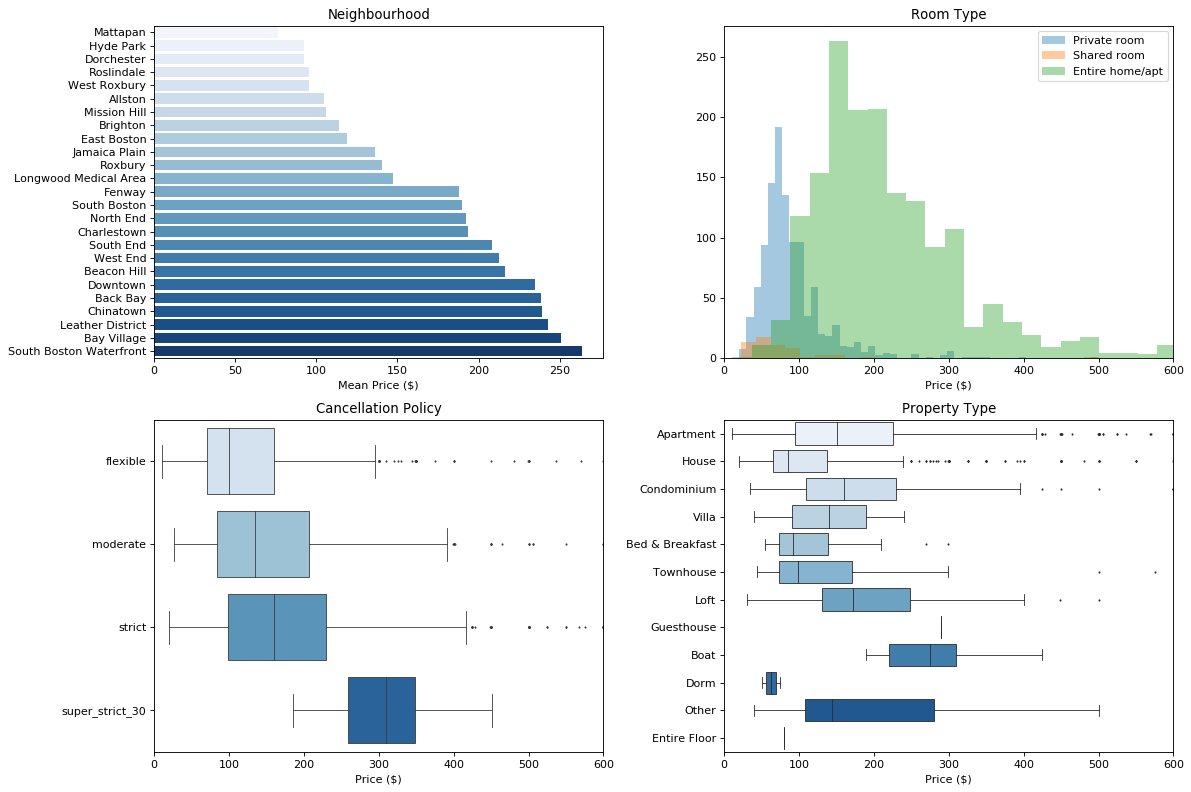

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=80)

# Neighbourhoods
neighbourhoods = df_list.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean
    }
).reset_index()
sns.barplot(
    x='price', y='neighbourhood_cleansed',
    data=neighbourhoods.sort_values('price'),
    orient='h',
    palette='Blues',
    ax=axs[0, 0]
)
axs[0, 0].set_title('Neighbourhood')
axs[0, 0].set_xlabel('Mean Price ($)')
axs[0, 0].set_ylabel('')

# Room_type
sns.distplot(df_list[df_list.room_type == 'Private room']['price'],
             kde=False, ax=axs[0, 1], label='Private room')
sns.distplot(df_list[df_list.room_type == 'Shared room']['price'],
             kde=False, ax=axs[0, 1], label='Shared room')
sns.distplot(df_list[df_list.room_type == 'Entire home/apt']['price'],
             kde=False, ax=axs[0, 1], label='Entire home/apt')
axs[0, 1].set_xlim(0, 600)
axs[0, 1].set_title('Room Type')
axs[0, 1].set_xlabel('Price ($)')
axs[0, 1].legend()

# Cancellation_policy
sns.boxplot(x='price', y='cancellation_policy', fliersize=1, linewidth=0.75,
            data=df_list, palette='Blues', ax=axs[1, 0],
            order=['flexible', 'moderate', 'strict', 'super_strict_30'])
axs[1, 0].set_xlim(0, 600)
axs[1, 0].set_title('Cancellation Policy')
axs[1, 0].set_xlabel('Price ($)')
axs[1, 0].set_ylabel('')

# Property_type
sns.boxplot(x='price', y='property_type', fliersize=1, linewidth=0.75,
            data=df_list, palette='Blues', ax=axs[1, 1])
axs[1, 1].set_xlim(0, 600)
axs[1, 1].set_title('Property Type')
axs[1, 1].set_xlabel('Price ($)')
axs[1, 1].set_ylabel('')

plt.tight_layout()
plt.show();

Strong relationship here between price and the number of bedrooms. We can also see a potentially non-linear relationship between bathrooms and price here.

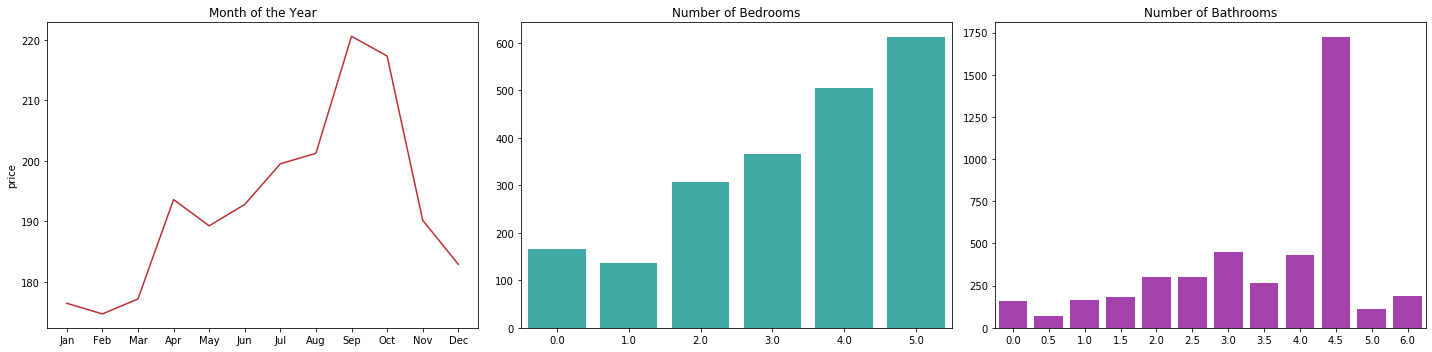

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Month plot
months = df.groupby('month').agg({'price': 'mean'}).reset_index()

months.month = months.month.astype('category')
sorter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months.month.cat.set_categories(sorter, inplace=True)

sns.lineplot(
    x='month', y='price',
    data=months,
    color='#BC2F38',
    ax=axs[0]
)
axs[0].set_title('Month of the Year')
axs[0].set_xlabel('')

# Bedrooms
bedrooms = df.groupby('bedrooms').agg({'price': 'mean'}).reset_index()
sns.barplot(
    x='bedrooms', y='price',
    data=bedrooms,
    orient='v',
    color='#2FBCB3',
    ax=axs[1]
)
axs[1].set_title('Number of Bedrooms')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# Bathrooms
bathrooms = df.groupby('bathrooms').agg({'price': 'mean'}).reset_index()
sns.barplot(
    x='bathrooms', y='price',
    data=bathrooms,
    orient='v',
    color='#B32FBC',
    ax=axs[2]
)
axs[2].set_title('Number of Bathrooms')
axs[2].set_xlabel('')
axs[2].set_ylabel('')

plt.tight_layout()

plt.show()


 We transformed text descriptions into character counts. Look at the numerical description features we created from the text summaries about the listing, neighbourhood, etc. 


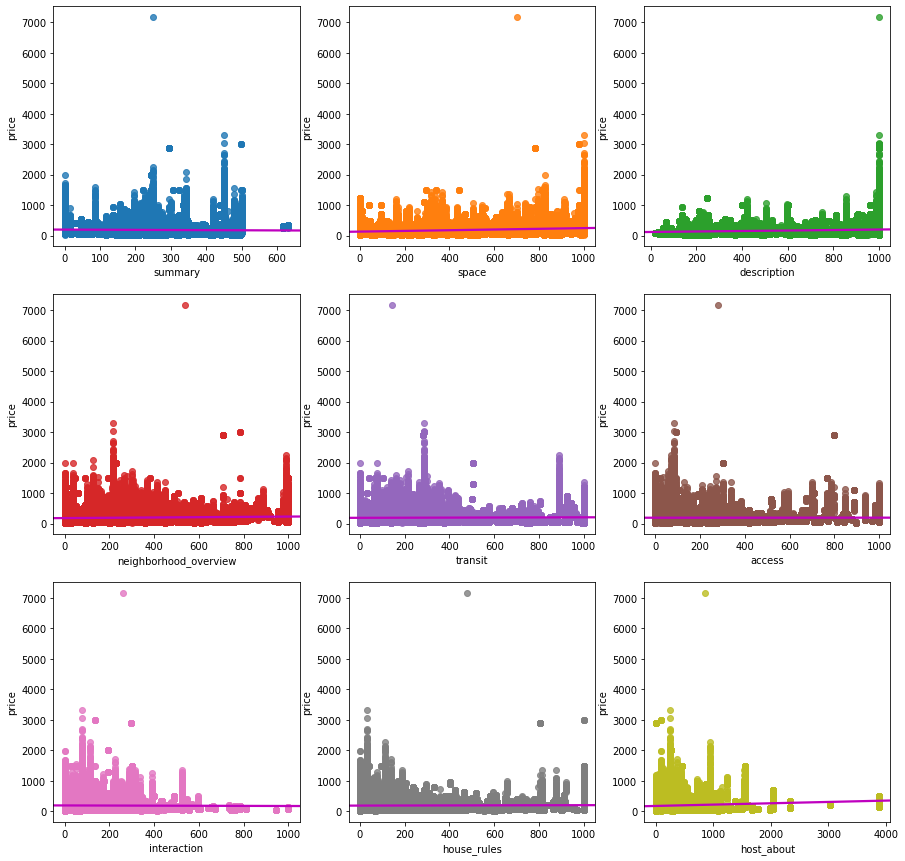

In [75]:
import re
description_features = ['summary', 'space', 'description',
                        'neighborhood_overview', 'transit', 'access',
                        'interaction', 'house_rules', 'host_about']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for feature, ax in zip(description_features, axs.reshape(-1)):
    sns.regplot(x=feature, y='price', data=df, ax=ax, ci=None, line_kws={'color': 'm'})

With no evidence of any strong relationships here, we'll drop these features to reduce complexity.

In [76]:
df = df.drop(description_features, axis=1)

In [77]:
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count,price,month
0,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,65.0,Aug
1,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,65.0,Aug
2,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,65.0,Aug
3,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,75.0,Aug
4,3075044,4,100.0,100.0,False,Roslindale,Apartment,Private room,2,1.0,...,9.0,True,moderate,1,1.3,1304,1,21,75.0,Aug


# Preprocessing

Final preprocessing, we'll deal with missing values, encode categorical features and drop the id column.

In [78]:
import re

# Dropping no property_type
df = df.dropna(subset=['property_type']).copy()

columns_with_null = df.columns[df.isnull().any()]
for column in columns_with_null:
    df[column] = df[column].fillna(df[column].median())

Finally create dummies and drop id column.

In [79]:
df = pd.get_dummies(df)
df = df.drop(['id'], axis=1)
df.sample(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,security_deposit,number_of_reviews,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
192832,4,100.0,100.0,False,4,1.5,2.0,2.0,1000.0,3,...,0,0,1,0,0,0,0,0,0,0
296671,2,77.0,33.0,False,3,1.0,1.0,1.0,250.0,3,...,0,0,1,0,0,0,0,0,0,0
183088,3,89.0,45.0,False,4,1.0,2.0,2.0,250.0,21,...,0,0,0,1,0,0,0,0,0,0


# Modelling

Reliable Linear Regression can best suit our needs. The data can contain nonlinear relationships that Linear Regression cannot capture, but it is important that it is easily interpretable. The coefficients provided by the model will allow us to easily get a rough idea of how much we should be.

Any potential nonlinear relationships with data use a tree-based ensemble method. Tree-based methods give us the flexibility to conform to nonlinear relationships, but they also tend to be very sensitive to small changes in the data.

# Linear Regression
With a reasonable amount of features, we'll have to take care of over-fitting the model by scoring it on both training and test sets. If we detect any bias / variance then we can look at one of the editing methods.

In [80]:
def print_scores(model):
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
    rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

    print(
        'Train R-squared : {:.3f}\t Train RMSE : ${:.2f}\
        \nTest R-squared : {:.3f}\t Test RMSE : ${:.2f}'
        .format(r2_train, rmse_train, r2_test, rmse_test)
    )

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df.drop('price', axis=1)
y = df.price

# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print_scores(model)


Train R-squared : 0.600	 Train RMSE : $96.99        
Test R-squared : 0.602	 Test RMSE : $96.97


Model spits out an R-squared score of approx 60% meaning that we can account for around approx 60% of the variance using our features using Linear Regression. We also need to bear in mind the significant standard deviation of the residuals represented by the 97$ root-mean-squared-error. Predictions made with the model have a large error margin.

In [82]:
feature_importance = pd.DataFrame(
    {'features': X.columns, 'coefficients': model.coef_}
).sort_values(by='coefficients')
feature_importance['features'] = feature_importance['features']

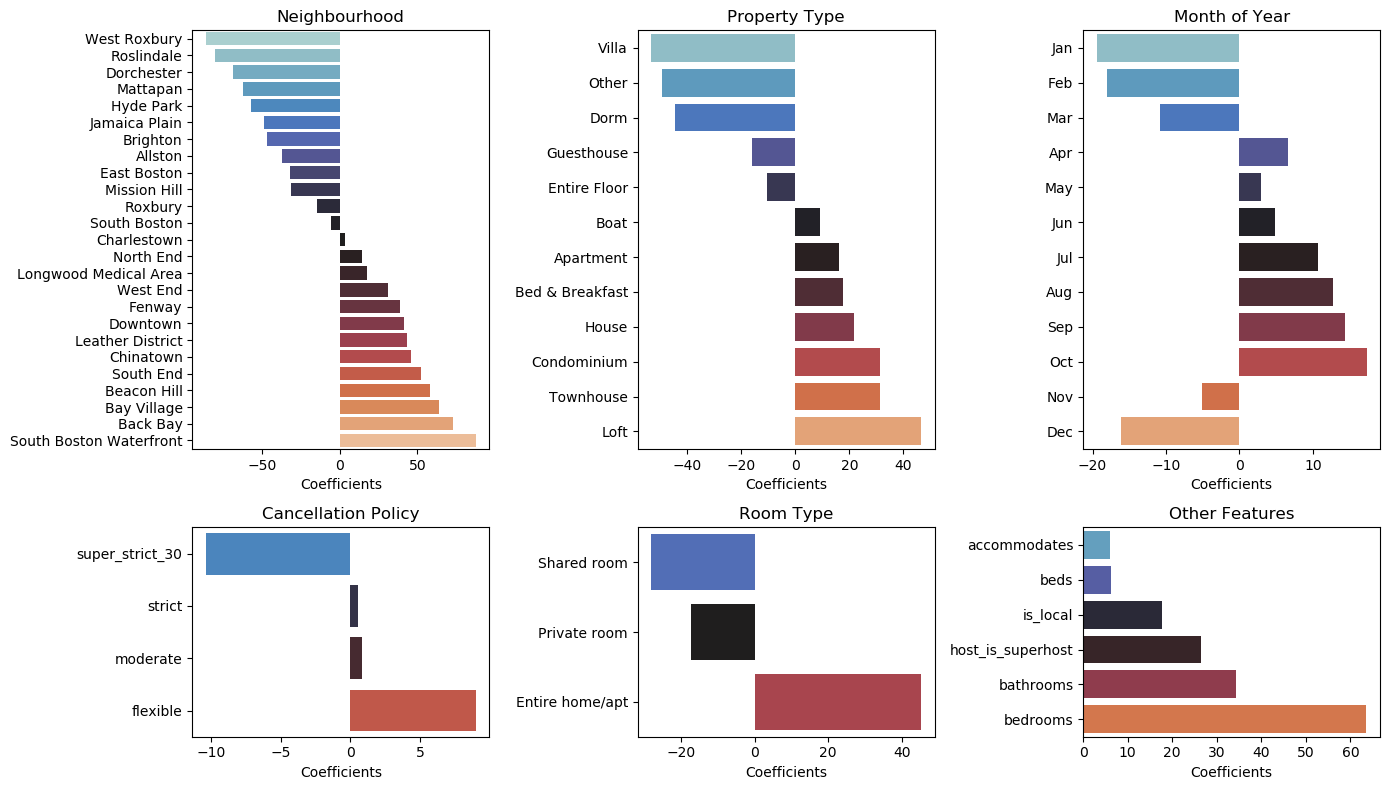

In [83]:
def filter_coefficients(keyword, coefficients_df):
    
    df = coefficients_df[coefficients_df.\
                         features.str.contains(keyword)].copy()
    df.features = df.features.str.lstrip(keyword+'_')
    
    return df

def plot_coefficients(coefficients_df, ax=None, palette='icefire', xlabel='Coefficients', title=None):
    
    sns.barplot(
        y='features', x='coefficients',
        orient='h', data=coefficients_df,
        palette=palette,
        ax = ax
    )
    if ax:
        ax.set_xlabel(xlabel)
        ax.set_ylabel('')
        ax.set_title(title)
    else:
        plt.xlabel(xlabel)
        plt.ylabel('')
        plt.title(title)
        
# Create subplot
fig, axs = plt.subplots(2, 3, figsize=(14, 8), dpi=100,
                        gridspec_kw = {'height_ratios': [4, 2]})

# Create lists
keywords = ['neighbourhood_cleansed', 'property_type', 'cancellation_policy', 'room_type']
titles = ['Neighbourhood', 'Property Type', 'Cancellation Policy', 'Room Type']
axes = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]

for kw, title, axis in zip(keywords, titles, axes):
    plot_coefficients(
        filter_coefficients(kw, feature_importance),
        ax=axis,
        title=title
    )

# Filter and sort months
month = filter_coefficients('month', feature_importance)
month.features = month.features.astype('category')
sorter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month['features'].cat.set_categories(sorter, inplace=True)
plot_coefficients(month, ax=axs[0, 2], title='Month of Year')

# Pick final features
other = feature_importance[feature_importance.features.isin(
    ['bedrooms', 'bathrooms', 'beds', 'accommodates',
     'host_is_superhost', 'is_local']
)].copy()
plot_coefficients(other, ax=axs[1, 2], title='Other Features')

fig.tight_layout()
plt.show();

Some clear drawbacks to this model. For one thing, it's possible to plug in data to return a negative listing price implying that you should pay back someone to come and stay in West Roxbury in December. However, whilst Linear Regression in this case may not be the best method to accurately predict listing prices, it does provide an easily interpeted model that can be used.

# Ensemble Methods

Ensembled methods allow us leverage the flexibility of tree-based models whilst reducing their tendency to memorise noise.

# Random Forests

Random Forests is one of the most powerful ML algorithms, despite its simplicity. It is an ensemble of Decision Trees, taking the average prediction from multiple individual trees all trained on a different random subset of the training data.

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, n_jobs=-1)
rf.fit(X_train, y_train)
print_scores(rf)

Train R-squared : 0.936	 Train RMSE : $38.75        
Test R-squared : 0.933	 Test RMSE : $39.70


Over 93% of the variance accounted for using Random Forests and with no sign of overfitting! Note though the sizable residual error standard deviation. There is stil a room for error even with so much of the variability in our dataset accounted for.

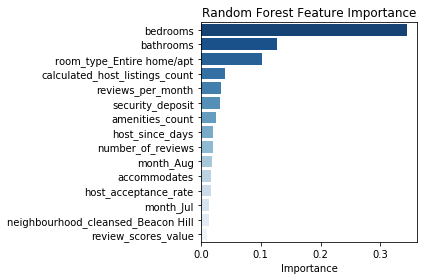

In [85]:
def get_feature_importances(model):
    
    df = pd.DataFrame(
        {'features': X.columns, 'coefficients': model.feature_importances_}
    ).sort_values(by='coefficients', ascending=False)[:15]
    return df
        
plot_coefficients(
    get_feature_importances(rf), xlabel='Importance',
    title='Random Forest Feature Importance', palette='Blues_r')

plt.tight_layout()
plt.show()

# Conclusion

With our features using a simple linear regression model, we were able to account for about 60% of the variance in Airbnb prices. Thanks to this, we can provide a method for calculating a good starting point for choosing Airbnb price. The more complex methods got a little more precise and aligned with the most important factors, but all agree that the predictions are not perfect and the variance in the data is not taken into account.

While our models do a great job of generalizing prices by features, each listing is unique, and what made the decision to choose airbnb depends on many features that we can't capture even though Airbnb is doing their best with their models.

What we look at here is a pricing and valuation according to certain data we have. But we do not have factors such as decoration of the house, wall color, etc. When we consider these factors, different results may arise.